# <h3 align="center">__Module 11 Activity__</h3>
# <h3 align="center">__Assigned at the start of Module 11__</h3>
# <h3 align="center">__Due at the end of Module 11__</h3><br>

# Weekly Discussion Forum Participation

Each week, you are required to participate in the module’s discussion forum. The discussion forum consists of the week's Module Activity, which is released at the beginning of the module. You must complete/attempt the activity before you can post about the activity and anything that relates to the topic.

## Grading of the Discussion

### 1. Initial Post:
Create your thread by **Day 5 (Saturday night at midnight, PST).**

### 2. Responses:
Respond to at least two other posts by **Day 7 (Monday night at midnight, PST).**

---

## Grading Criteria:

Your participation will be graded as follows:

### Full Credit (100 points):
- Submit your initial post by **Day 5.**
- Respond to at least two other posts by **Day 7.**

### Half Credit (50 points):
- If your initial post is late but you respond to two other posts.
- If your initial post is on time but you fail to respond to at least two other posts.

### No Credit (0 points):
- If both your initial post and responses are late.
- If you fail to submit an initial post and do not respond to any others.

---

## Additional Notes:

- **Late Initial Posts:** Late posts will automatically receive half credit if two responses are completed on time.
- **Substance Matters:** Responses must be thoughtful and constructive. Comments like “Great post!” or “I agree!” without further explanation will not earn credit.
- **Balance Participation:** Aim to engage with threads that have fewer or no responses to ensure a balanced discussion.

---

## Avoid:
- A number of posts within a very short time-frame, especially immediately prior to the posting deadline.
- Posts that complement another post, and then consist of a summary of that.


# Problem 1: Updating Weights for a Neural Network

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

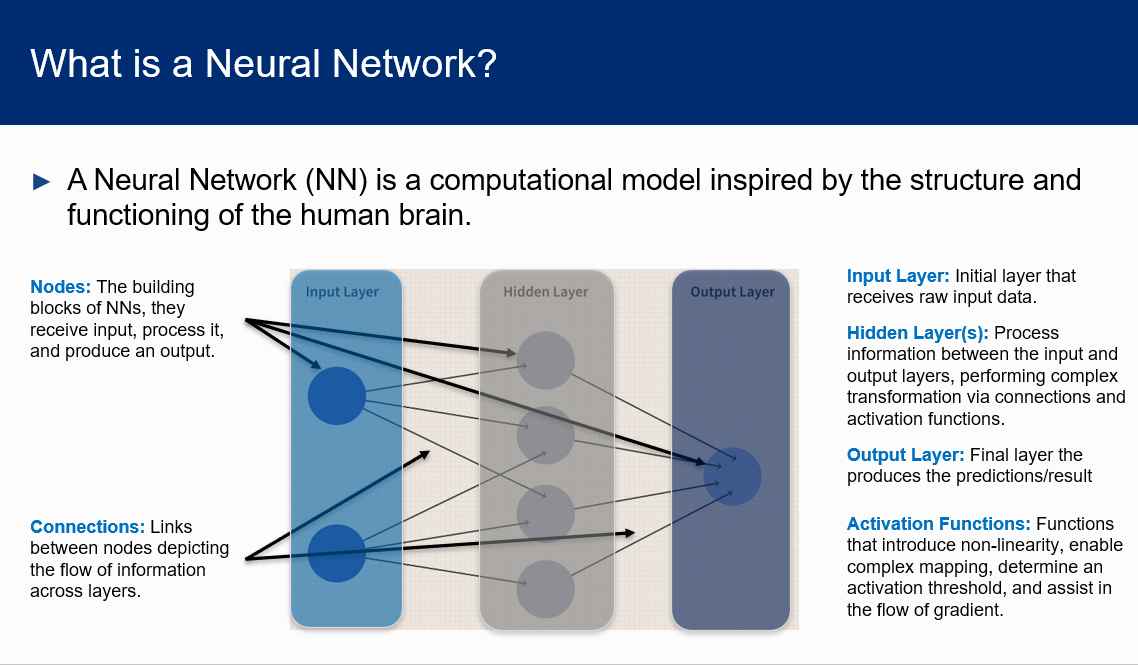

## How does a Neural Network Learn?

1. __Initialize__ the Neural Network with random weights/biases.
2. __Forward Pass__ (Inference) data through the input, hidden, and output layers.
3. __Calculate Error__ using error or loss function
4. __Backpropagation__ involving the adjustment of the weights/biases to minimize error, utilizing optimization algorithm.
5. __Repeat__ to convergence.
   
## How does the individual neuron or node participate in this?

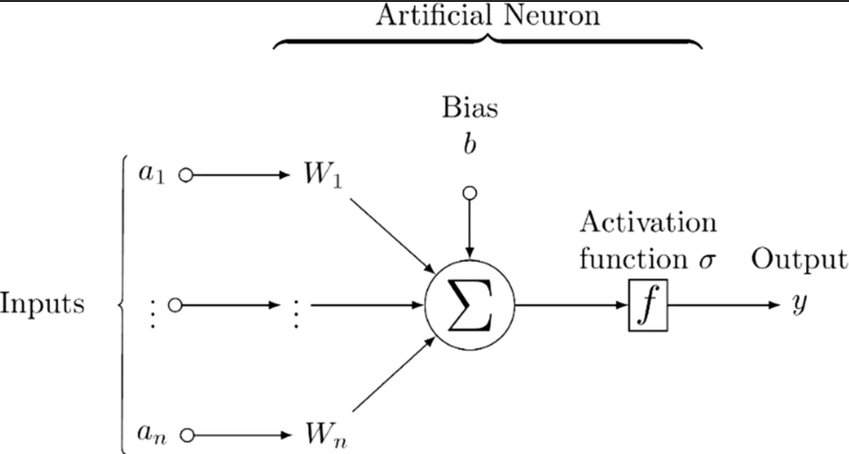

If we look at this Neuron there are two distinct things happening within each:
1. The summation of the inputs and the weights (addition of bias)
2. An activation function to normalize the value into a particular fashion to be given as inputs to the next layer.

## How does the summation work?

Let's take a look.

If we are going off the above diagram for one neuron then the summation is:

$$a_1 * W_1 + ... + a_n * W_n + b$$

where, $a$ is the input $W$ is the weight and $b$ is the bias. Using the $\sum$ we can then calculate an output after using an activation function, $\sigma$ to normalize the value.

## What do activation functions look like?

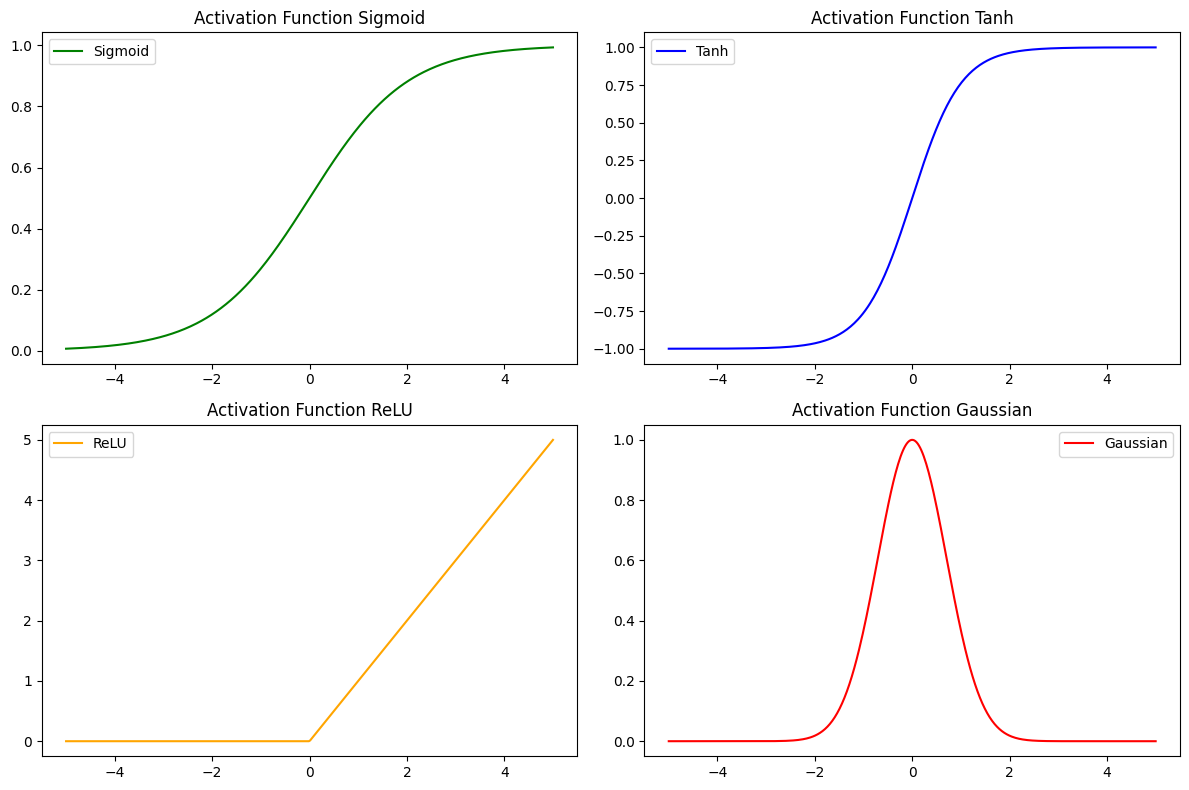

In [ ]:
# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def gaussian(x):
    return np.exp(-x**2)

# Generate x values
x = np.linspace(-5, 5, 400)

# Calculate y values for each activation function
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_gaussian = gaussian(x)

# Create subplots for each activation function
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, y_sigmoid, label='Sigmoid', color='green')
plt.title('Activation Function Sigmoid')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, y_tanh, label='Tanh', color='blue')
plt.title('Activation Function Tanh')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, y_relu, label='ReLU', color='orange')
plt.title('Activation Function ReLU')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, y_gaussian, label='Gaussian', color='red')
plt.title('Activation Function Gaussian')
plt.legend()

plt.tight_layout()
plt.show()


Each activation function, of which there are many, have different purposes and different ranges that make them preferable for different purposes.

Once we secure an input and output for each neuron all the way to the output layer we call that the feed forward process. We now have to calculate the error.

## How do we compute the error?

This will be up to the design of the network but we will show two main one used for regression and classification respectively:

### Mean Squared Error

$$\frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2$$

### Binary Cross-Entropy/Log Loss

$$- \frac{1}{n}\sum_{i=1}^{n} (y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1-\hat{y}_i))$$

Now that we have the total error of the system the point now is to distribute the total error back into the system adjusting the weights in order to minimize the loss. The weights are updated in such a way that when the next forward pass utilized the updated weights, the total error of the system is reduced by a certain margin. This happens over and over again until you reach a local minimum, which is the convergence.

## How do we perform the backpropagation to distribute the error?

Now this is cool because we are going to use the Chain rule from Calculus and see how the output neuron (node) is affected by each of the steps before it.

Recall:

$$\frac{dy}{dx} = \frac{dy}{du} * \frac{du}{dx}$$

So let's presume we have a network with one hidden layer with two nodes ($h_1$ and $h_2$) with inputs ($i_1$ and $i_2$) and output layers ($o_1$ and $o_2$) with weights connecting between each.

Then,

$$\frac{\partial E_{total}}{\partial W_n} = \frac{\partial E_{total}}{\partial output_{o_n}} * \frac{\partial output_{o_n}}{\partial sum_{o_n}} * \frac{\partial sum_{o_n}}{\partial W_n} $$

So for all the weights, $W_n$ you compute the partial derivatives and use the chain rule to obtain the $\frac{\partial E_{total}}{\partial W_n} $

## How do you update the weights?

$$W_{n}^{new} = W_{n}^{old} - \eta \times \frac{\partial E_{total}}{\partial W_n}$$

$\eta$ is called the __learning rate__ and is a hyper parameter that scales the computed gradients before updating the weights. The typical weight update rule in gradient descent is shown above. If the learning rate is to high it may cause the updates to overshoot the optimal values, potentially leading to divergence or oscillations. A low learning rate makes the convergence process slower and might get trapped in local minima.

This is considered one backpropagation cycle. You then continue until local convergence. This is how you can start with randomized or uninformed weights and still converge to optimum values.

## How do you determine convergence?

When the gradients $\frac{\partial E_{total}}{\partial W_n}$ become very small (approaching zero), it indicates that the weights are near a local minimum. If you are tracking loss and the loss stops decreasing significantly between epochs, the network is likely converging. If the performance on a held-out set stops improving, further training might not be beneficial and if the change in weights becomes negligible over iteration then convergence has most likely been reached.

Now it's your turn.

## Activity

Using the network below, please calculate the new weights from one forward and backward pass through the network. Please use Mean Squared Error as your loss function. Use the sigmoid function as your activation function. Use a learning rate of 0.001. No bias.

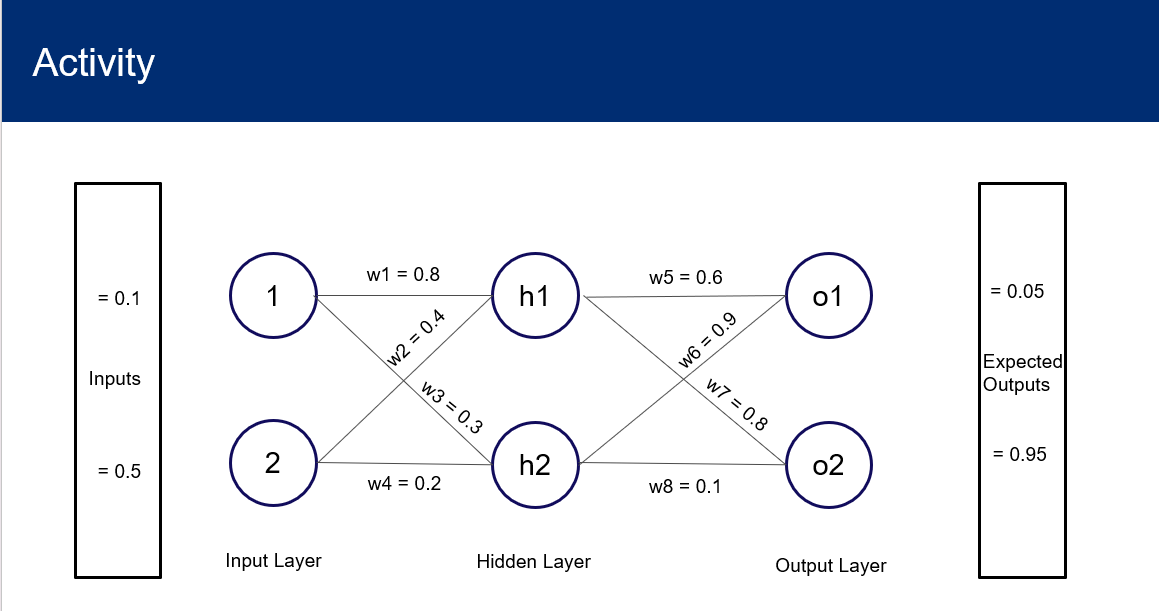

## Deliverables:
Students will:
### Submit any document showing the calculations of the error and backpropagation.

In [6]:
import numpy as np

# Activation Function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the Sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Input values
i1 = 0.1
i2 = 0.5
inputs = np.array([i1, i2])

# Expected (target) outputs
t1 = 0.05
t2 = 0.95
targets = np.array([t1, t2])

# Initial weights
w1, w2, w3, w4 = 0.8, 0.4, 0.3, 0.2
w5, w6, w7, w8 = 0.6, 0.9, 0.8, 0.1
weights = {
    'w1': w1, 'w2': w2, 'w3': w3, 'w4': w4,
    'w5': w5, 'w6': w6, 'w7': w7, 'w8': w8
}

# Learning Rate
learning_rate = 0.001

print("1. Forward Pass")

# Hidden Layer Calculations
# Calculate the net input to the hidden layer neurons
net_h1 = weights['w1'] * i1 + weights['w2'] * i2
net_h2 = weights['w3'] * i1 + weights['w4'] * i2

# Calculate the output (activation) of the hidden layer neurons
a_h1 = sigmoid(net_h1)
a_h2 = sigmoid(net_h2)

print(f"Net input for h1: {net_h1:.4f}")
print(f"Activation of h1 (a_h1): {a_h1:.4f}")
print(f"Net input for h2: {net_h2:.4f}")
print(f"Activation of h2 (a_h2): {a_h2:.4f}\n")

# Output Layer Calculations
# Calculate the net input to the output layer neurons
net_o1 = weights['w5'] * a_h1 + weights['w6'] * a_h2
net_o2 = weights['w7'] * a_h1 + weights['w8'] * a_h2

# Calculate the final output (activation) of the network
a_o1 = sigmoid(net_o1)
a_o2 = sigmoid(net_o2)

print(f"Net input for o1: {net_o1:.4f}")
print(f"Final output of o1 (a_o1): {a_o1:.4f}")
print(f"Net input for o2: {net_o2:.4f}")
print(f"Final output of o2 (a_o2): {a_o2:.4f}\n")


print("2. Error Calculation")

# Calculate the error for each output neuron
E1 = 0.5 * (t1 - a_o1)**2
E2 = 0.5 * (t2 - a_o2)**2
E_total = E1 + E2

print(f"Error for o1 (E1): {E1:.8f}")
print(f"Error for o2 (E2): {E2:.8f}")
print(f"Total Error (E_total): {E_total:.8f}\n")

print("3. Backward Pass (Backpropagation)")

# Phase 1: Update weights between Hidden and Output Layer (w5, w6, w7, w8)
print("Updating Weights (Hidden -> Output)")

# The gradient for the output layer is:
# dE/dw = dE/da_o * da_o/dnet_o * dnet_o/dw
# dE/da_o = -(target - actual)
# da_o/dnet_o = sigmoid_derivative(a_o)
# dnet_o/dw = a_h

delta_o1 = (a_o1 - t1) * sigmoid_derivative(a_o1)
delta_o2 = (a_o2 - t2) * sigmoid_derivative(a_o2)

# Calculate gradients for w5, w6, w7, w8
grad_w5 = delta_o1 * a_h1
grad_w6 = delta_o1 * a_h2
grad_w7 = delta_o2 * a_h1
grad_w8 = delta_o2 * a_h2

# Update weights
weights['w5'] -= learning_rate * grad_w5
weights['w6'] -= learning_rate * grad_w6
weights['w7'] -= learning_rate * grad_w7
weights['w8'] -= learning_rate * grad_w8

print(f"Gradient for w5: {grad_w5:.8f} -> New w5: {weights['w5']:.8f}")
print(f"Gradient for w6: {grad_w6:.8f} -> New w6: {weights['w6']:.8f}")
print(f"Gradient for w7: {grad_w7:.8f} -> New w7: {weights['w7']:.8f}")
print(f"Gradient for w8: {grad_w8:.8f} -> New w8: {weights['w8']:.8f}\n")


# Phase 2: Update weights between Input and Hidden Layer (w1, w2, w3, w4)
print("Updating Weights (Input -> Hidden)")

# The gradient for the hidden layer is:
# dE/dw = dE/da_h * da_h/dnet_h * dnet_h/dw
# dE/da_h = Sum of (dE/dnet_o * dnet_o/da_h) for each output neuron
# dE/da_h1 = (delta_o1 * w5) + (delta_o2 * w7)
# dE/da_h2 = (delta_o1 * w6) + (delta_o2 * w8)

delta_h1 = (delta_o1 * w5 + delta_o2 * w7) * sigmoid_derivative(a_h1)
delta_h2 = (delta_o1 * w6 + delta_o2 * w8) * sigmoid_derivative(a_h2)

# Calculate gradients for w1, w2, w3, w4
grad_w1 = delta_h1 * i1
grad_w2 = delta_h2 * i1
grad_w3 = delta_h1 * i2
grad_w4 = delta_h2 * i2

# Update weights
weights['w1'] -= learning_rate * grad_w1
weights['w2'] -= learning_rate * grad_w2
weights['w3'] -= learning_rate * grad_w3
weights['w4'] -= learning_rate * grad_w4

print(f"Gradient for w1: {grad_w1:.8f} -> New w1: {weights['w1']:.8f}")
print(f"Gradient for w2: {grad_w2:.8f} -> New w2: {weights['w2']:.8f}")
print(f"Gradient for w3: {grad_w3:.8f} -> New w3: {weights['w3']:.8f}")
print(f"Gradient for w4: {grad_w4:.8f} -> New w4: {weights['w4']:.8f}\n")


# --- Final Results ---
print("--- Final Results after one pass ---")
print(f"Original Total Error: {E_total:.8f}")
print("Final Updated Weights:")
for key, value in weights.items():
    print(f"  {key}: {value:.8f}")

1. Forward Pass
Net input for h1: 0.2800
Activation of h1 (a_h1): 0.5695
Net input for h2: 0.1300
Activation of h2 (a_h2): 0.5325

Net input for o1: 0.8209
Final output of o1 (a_o1): 0.6944
Net input for o2: 0.5089
Final output of o2 (a_o2): 0.6245

2. Error Calculation
Error for o1 (E1): 0.20764831
Error for o2 (E2): 0.05296066
Total Error (E_total): 0.26060897

3. Backward Pass (Backpropagation)
Updating Weights (Hidden -> Output)
Gradient for w5: 0.07788311 -> New w5: 0.59992212
Gradient for w6: 0.07281094 -> New w6: 0.89992719
Gradient for w7: -0.04346529 -> New w7: 0.80004347
Gradient for w8: -0.04063459 -> New w8: 0.10004063

Updating Weights (Input -> Hidden)
Gradient for w1: 0.00051472 -> New w1: 0.79999949
Gradient for w2: 0.00287383 -> New w2: 0.39999713
Gradient for w3: 0.00257361 -> New w3: 0.29999743
Gradient for w4: 0.01436917 -> New w4: 0.19998563

--- Final Results after one pass ---
Original Total Error: 0.26060897
Final Updated Weights:
  w1: 0.79999949
  w2: 0.399997

**Explanation of the Results**

- **Forward Pass:** We start with inputs `0.1` and `0.5`. After passing through the network with the initial weights, the final predicted outputs are a_o1 = `0.6944` and a_o2 = `0.6245`.
- **Error Calculation:** We compare these predictions to the expected outputs (0.05 and 0.95). The total error is calculated to be `0.26060897`. Our goal is to reduce this error.
- **Backward Pass:**
  - **Hidden to Output:** The backpropagation algorithm calculates how much each weight (w5 through w8) contributed to the total error. For example, the gradient for w5 is `0.07788311`. We use this gradient and the learning rate to make a small adjustment to w5. We repeat this for all weights in this layer.
  - **Input to Hidden:** This step is more complex because the error at a hidden neuron (like h1) is the sum of the errors from the output neurons it connects to (o1 and o2). We calculate this "downstream" error and use it to find the gradients for w1 through w4, updating them accordingly.

After this single pass, we have a new set of slightly adjusted weights. If we were to perform another forward pass with these new weights, the total error would be slightly lower than `0.26060897`. Repeating this process thousands of times is what "training" a neural network is all about.

### Write a brief reflection (2-3 sentences) on what you learned and found challenging.

- Manually performing backpropagation provides a great intuition for how a neural network truly learns, translating the abstract concept of "learning" into a concrete flow of error attribution and weight adjustments.
- The main challenge is the meticulous, error-prone nature of tracking each partial derivative, which immediately highlights the necessity and power of modern deep learning frameworks.
- This exercise help to fosters a deep appreciation for the automation that allows us to build and train complex architectures without getting lost in the calculus.

